In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve


# Analisis de datos

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
datos_df = pd.read_csv('UniversalBank.csv')
datos_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
#target  variable : Personal Loan

In [6]:
#Examinando valores nulos
datos_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#Examinando valores ruido
datos_df.min()


ID                       1.0
Age                     23.0
Experience              -3.0
Income                   8.0
ZIP Code              9307.0
Family                   1.0
CCAvg                    0.0
Education                1.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   0.0
CreditCard               0.0
dtype: float64

In [8]:
#Eliminando valores negativos
datos_df = datos_df.drop(datos_df[datos_df['Experience']<0].index)
datos_df.min()

ID                       1.0
Age                     24.0
Experience               0.0
Income                   8.0
ZIP Code              9307.0
Family                   1.0
CCAvg                    0.0
Education                1.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   0.0
CreditCard               0.0
dtype: float64

In [9]:
datos_df.max()

ID                     5000.0
Age                      67.0
Experience               43.0
Income                  224.0
ZIP Code              96651.0
Family                    4.0
CCAvg                    10.0
Education                 3.0
Mortgage                635.0
Personal Loan             1.0
Securities Account        1.0
CD Account                1.0
Online                    1.0
CreditCard                1.0
dtype: float64

In [10]:
datos_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.009794,-0.009406,-0.017255,0.013516,-0.016382,-0.025607,0.021902,-0.011172,-0.025124,-0.018961,-0.007085,-0.001508,0.017294
Age,-0.009794,1.000000,0.994101,-0.058006,-0.029325,-0.039279,-0.050879,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,-0.009406,0.994101,1.000000,-0.049245,-0.028564,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.017255,-0.058006,-0.049245,1.000000,-0.014958,-0.155666,0.646178,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
ZIP Code,0.013516,-0.029325,-0.028564,-0.014958,1.000000,0.011109,-0.002703,-0.017391,0.008264,0.000251,0.003555,0.020149,0.019155,0.007355
Family,-0.016382,-0.039279,-0.045610,-0.155666,0.011109,1.000000,-0.107230,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.025607,-0.050879,-0.048939,0.646178,-0.002703,-0.107230,1.000000,-0.133939,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Education,0.021902,0.046222,0.018243,-0.187992,-0.017391,0.064032,-0.133939,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.011172,-0.015184,-0.013459,0.206921,0.008264,-0.020419,0.109905,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.025124,-0.014204,-0.014121,0.504228,0.000251,0.063088,0.369388,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776


In [11]:
#sns.pairplot(datos_df, hue='Personal Loan' )
#plt.show()

In [12]:
#Revisando la correlación entre variables para ver cual eliminar del cálculo
datos_df.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.504228
CCAvg                 0.369388
CD Account            0.315769
Mortgage              0.142322
Education             0.138339
Family                0.063088
Securities Account    0.022216
Online                0.006175
CreditCard            0.002776
ZIP Code              0.000251
Experience           -0.014121
Age                  -0.014204
ID                   -0.025124
Name: Personal Loan, dtype: float64

In [13]:
datos_df.corr()['Personal Loan'].sort_values(ascending=True)

ID                   -0.025124
Age                  -0.014204
Experience           -0.014121
ZIP Code              0.000251
CreditCard            0.002776
Online                0.006175
Securities Account    0.022216
Family                0.063088
Education             0.138339
Mortgage              0.142322
CD Account            0.315769
CCAvg                 0.369388
Income                0.504228
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

In [14]:
datos_df.corr()['Personal Loan'].sort_values(ascending=True)

ID                   -0.025124
Age                  -0.014204
Experience           -0.014121
ZIP Code              0.000251
CreditCard            0.002776
Online                0.006175
Securities Account    0.022216
Family                0.063088
Education             0.138339
Mortgage              0.142322
CD Account            0.315769
CCAvg                 0.369388
Income                0.504228
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

In [15]:
#Nos quedamos solo con las variables con correlación más baja
#datos_df = datos_df.drop(columns=['Income'])
#datos_df = datos_df.drop(columns=['CCAvg'])
#datos_df = datos_df.drop(columns=['CD Account'])
#datos_df = datos_df.drop(columns=['Mortgage'])

#datos_df


In [16]:
#Sólo se mantienen las columnas con menor correlación
#Age                  -0.014204
#Experience           -0.014121
#CreditCard            0.002776
#Online                0.006175
#Securities Account    0.022216
#Family                0.063088
#Education             0.138339

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


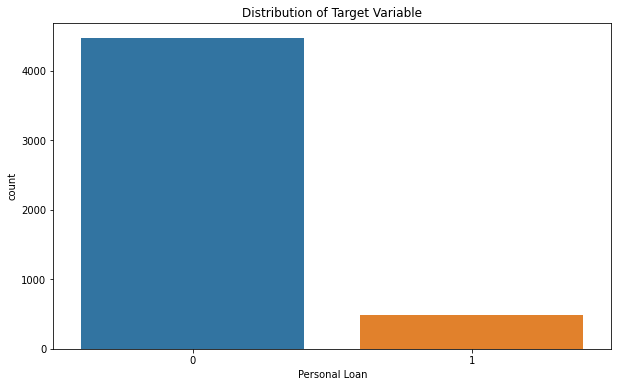

In [17]:
plt.figure(figsize = (10,6))
sns.countplot('Personal Loan',data=datos_df).set_title('Distribution of Target Variable')
plt.show()

In [18]:
X_tmp = datos_df.drop('Personal Loan',axis=1)
Y_tmp = datos_df['Personal Loan']

X = np.array(X_tmp)
Y = np.array(Y_tmp)


**Análisis de Chi cuadrada para saber con cuáles variables nos quedamos**

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, Y)
X_new

array([[49.,  0.],
       [34.,  0.],
       [11.,  0.],
       ...,
       [24.,  0.],
       [49.,  0.],
       [83.,  0.]])

In [21]:
X_new[0,:]

array([49.,  0.])

In [22]:
X[0,:]

array([1.0000e+00, 2.5000e+01, 1.0000e+00, 4.9000e+01, 9.1107e+04,
       4.0000e+00, 1.6000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

In [23]:
best =  SelectKBest(chi2, k=6).fit(X,Y)
best.get_feature_names_out()

#Seleccionamos las variables con más independencia para quedarnos con ellas

array(['x0', 'x3', 'x6', 'x7', 'x8', 'x10'], dtype=object)

In [24]:
# X0 Age	
# X1 Experience	
# X2 Income
# X3 Family
# X4 CCAvg
# X5 Education
# X6 Mortgage
# X7 Personal Loan
# X8 Securities Account
# X9 CD Account
# X10 Online
# X11 CreditCard

In [25]:
#Eliminamos las columnas de acuerdo a chi cuadrada
datos_df = datos_df.drop(columns=['Age'])
datos_df = datos_df.drop(columns=['Experience'])
datos_df = datos_df.drop(columns=['Securities Account'])
datos_df = datos_df.drop(columns=['Online'])
datos_df = datos_df.drop(columns=['CreditCard'])
datos_df = datos_df.drop(columns=['ID'])
datos_df = datos_df.drop(columns=['ZIP Code'])
datos_df

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0
...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0
4996,15,4,0.4,1,85,0,0
4997,24,2,0.3,3,0,0,0
4998,49,3,0.5,2,0,0,0


In [26]:
datos_df

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0
...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0
4996,15,4,0.4,1,85,0,0
4997,24,2,0.3,3,0,0,0
4998,49,3,0.5,2,0,0,0


In [27]:
X_tmp = datos_df.drop('Personal Loan',axis=1)
Y_tmp = datos_df['Personal Loan']

X = np.array(X_tmp)
Y = np.array(Y_tmp)

**Dividimos la BD en entrenamiento y prueba**

In [28]:
from sklearn.model_selection import train_test_split
X = datos_df.drop('Personal Loan',axis=1)
Y = datos_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify = Y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3463, 6), (1485, 6), (3463,), (1485,))

**Modelo Naive Bayes**

In [29]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

**Entrenamiento**

In [30]:
NB.fit(X_train,y_train)

GaussianNB()

**Predict**

In [41]:
predic = NB.predict(X_test)

In [42]:
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)
print(predic.sum())

la probabilidad de acierto 

89.36026936026936
176


**Precisión (accuracy)**

In [48]:
accuracy_score(y_test, predic)

0.8936026936026936

**Matriz de Confusión**

In [43]:

pd.crosstab(y_test, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1246,95,1341
1,63,81,144
All,1309,176,1485


In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


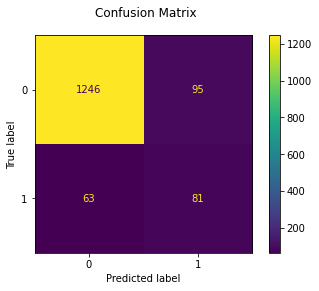

In [44]:
fig = plot_confusion_matrix(NB, X_test, y_test, display_labels=NB.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

**Métricas**

In [45]:
print(classification_report(y_test, predic))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1341
           1       0.46      0.56      0.51       144

    accuracy                           0.89      1485
   macro avg       0.71      0.75      0.72      1485
weighted avg       0.90      0.89      0.90      1485



**Curva ROC**

In [46]:
from sklearn.metrics import roc_curve
FPR, TPR, Thresholds = roc_curve(y_test, predic)

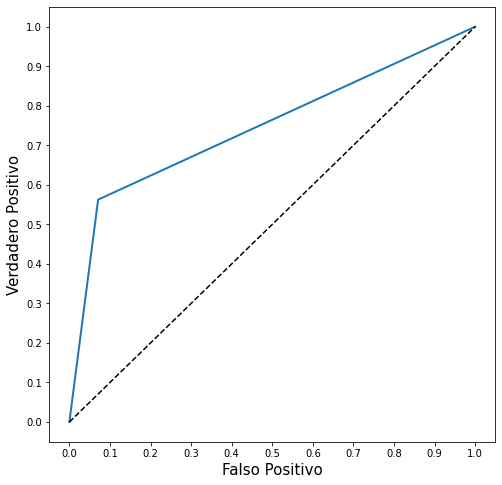

In [47]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.plot(FPR, TPR, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel("Falso Positivo", fontsize = 15)
ax.set_ylabel("Verdadero Positivo", fontsize = 15)
ax.set_xticks(np.linspace(0, 1, 11));
ax.set_yticks(np.linspace(0, 1, 11));